# About the data

About Dataset :
“How many beds should an ICU provide to serve the population?” 
“Which is the most critical body information to monitor in an ICU?”
The data consist of records from 12,000 ICU stays. All patients were adults who were admitted for a wide variety of reasons to cardiac, medical, surgical, and trauma ICUs. ICU stays of less than 48 hours have been excluded.


# General Descriptors

These six descriptors are collected at the time the patient is admitted to the ICU. Their associated time-stamps are set to 00:00 (thus they appear at the beginning of each patient's record).

      RecordID (a unique integer for each ICU stay)
      Age (years)
      Gender (0: female, or 1: male)
      Height (cm)
      ICUType (1: Coronary Care Unit, 2: Cardiac Surgery Recovery Unit,
               3: Medical ICU, or 4: Surgical ICU)
      Weight (kg)*.

Acute Physiology and Chronic  Health  Evaluation  (APACHE)  

Simplified  Acute  Physiology  Score              (SAPS) 

Sequential  Organ  Failure  Assessment            (SOFA) 

Time Series
These 37 variables may be observed once, more than once, or not at all in some cases:


    1.      Albumin (g/dL)
    2.      ALP [Alkaline phosphatase (IU/L)]
    3.      ALT [Alanine transaminase (IU/L)]
    4.      AST [Aspartate transaminase (IU/L)]
    5.      Bilirubin (mg/dL)
    6.      BUN [Blood urea nitrogen (mg/dL)]
    7.      Cholesterol (mg/dL)
    8.      Creatinine [Serum creatinine (mg/dL)]
    9.      DiasABP [Invasive diastolic arterial blood pressure (mmHg)]
    10.     FiO2 [Fractional inspired O2 (0-1)]
    11.     GCS [Glasgow Coma Score (3-15)]
    12.     Glucose [Serum glucose (mg/dL)]
    13.     HCO3 [Serum bicarbonate (mmol/L)]
    14.     HCT [Hematocrit (%)]
    15.     HR [Heart rate (bpm)]
    16.     K [Serum potassium (mEq/L)]
    17.     Lactate (mmol/L)
    18.     Mg [Serum magnesium (mmol/L)]
    19.     MAP [Invasive mean arterial blood pressure (mmHg)]
    20.     MechVent [Mechanical ventilation respiration (0:false, or 1:true)]
    21.     Na [Serum sodium (mEq/L)]
    22.     NIDiasABP [Non-invasive diastolic arterial blood pressure (mmHg)]
    23.     NIMAP [Non-invasive mean arterial blood pressure (mmHg)]
    24.     NISysABP [Non-invasive systolic arterial blood pressure (mmHg)]
    25.     PaCO2 [partial pressure of arterial CO2 (mmHg)]
    26.     PaO2 [Partial pressure of arterial O2 (mmHg)]
    27.     pH [Arterial pH (0-14)]
    28.     Platelets (cells/nL)
    29.     RespRate [Respiration rate (bpm)]
    30.     SaO2 [O2 saturation in hemoglobin (%)]
    31.     SysABP [Invasive systolic arterial blood pressure (mmHg)]
    32.     Temp [Temperature (°C)]
    33.     TropI [Troponin-I (μg/L)]
    34.     TropT [Troponin-T (μg/L)]
    35.     Urine [Urine output (mL)]
    36.     WBC [White blood cell count (cells/nL)]
    37.     Weight (kg)*





# ICU admission characteristics and mortality rates

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import os


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

root_dir = "/content/gdrive/My Drive/Colab Notebooks/ICU Project/"
directory = root_dir + 'assets/'

Mounted at /content/gdrive


In [3]:
info_df = pd.read_csv(directory + 'info.csv')
readings_df = pd.read_csv(directory + 'readings.csv')
outcomes_df = pd.read_csv(directory + 'outcomes.csv')


In [4]:
readings_df.columns

Index(['RecordID', 'Time', 'Parameter', 'Value'], dtype='object')

In [5]:
outcomes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   RecordID           4000 non-null   int64
 1   SAPS-I             4000 non-null   int64
 2   SOFA               4000 non-null   int64
 3   Length_of_stay     4000 non-null   int64
 4   Survival           4000 non-null   int64
 5   In-hospital_death  4000 non-null   int64
dtypes: int64(6)
memory usage: 187.6 KB


In [6]:
readings_df["Parameter"].value_counts()

HR             228538
MAP            145760
SysABP         145650
DiasABP        145567
Urine          136918
Weight         129165
NISysABP        98331
NIDiasABP       98210
NIMAP           96871
Temp            86405
GCS             61563
RespRate        55051
FiO2            32390
MechVent        31144
pH              24355
PaCO2           23293
PaO2            23268
HCT             18271
K               14440
Platelets       14104
Creatinine      13983
BUN             13916
HCO3            13613
Mg              13590
Na              13570
Glucose         13021
WBC             12910
SaO2             8185
Lactate          8024
Bilirubin        3191
AST              3182
ALT              3177
ALP              3092
Albumin          2356
TroponinT        2126
TroponinI         435
Cholesterol       315
Name: Parameter, dtype: int64

In [7]:
#readings_df.groupby("RecordID")[['HR']].mean()

# Exploring the dataSet

In [8]:
outcomes_df.head()

,RecordID,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death
0,132539,6,1,5,-1,0
1,132540,16,8,8,-1,0
2,132541,21,11,19,-1,0
3,132543,7,1,9,575,0
4,132545,17,2,4,918,0


In [9]:
outcomes_df.shape


(4000, 6)

In [10]:
info_df.head()

,RecordID,Age,Gender,Height,ICUType,Weight
0,140271.0,81.0,0.0,162.6,2.0,74.5
1,140204.0,77.0,1.0,170.2,4.0,104.0
2,140389.0,42.0,0.0,-1.0,3.0,92.0
3,139975.0,38.0,0.0,-1.0,3.0,73.0
4,140220.0,50.0,0.0,165.1,2.0,50.2


In [11]:
info_df['Age'].min()

15.0

In [12]:
info_df['Age'].max()

90.0

In [13]:
readings_df.head()

,RecordID,Time,Parameter,Value
0,140271.0,00:00,DiasABP,71.0
1,140271.0,00:00,GCS,3.0
2,140271.0,00:00,HR,91.0
3,140271.0,00:00,MAP,115.0
4,140271.0,00:00,SysABP,178.0


In [14]:
df_merge = info_df.merge(outcomes_df)

In [15]:
df_merge.shape

(4000, 11)

In [16]:
df_merge.isnull().sum()

RecordID             0
Age                  0
Gender               0
Height               0
ICUType              0
Weight               0
SAPS-I               0
SOFA                 0
Length_of_stay       0
Survival             0
In-hospital_death    0
dtype: int64

In [17]:
df_merge.isnull().sum() / len(df_merge)

RecordID             0.0
Age                  0.0
Gender               0.0
Height               0.0
ICUType              0.0
Weight               0.0
SAPS-I               0.0
SOFA                 0.0
Length_of_stay       0.0
Survival             0.0
In-hospital_death    0.0
dtype: float64

In [18]:
#df_merge : is merging both the info_df and outcomes_df together to do the visualizations
df_merge = info_df.merge(outcomes_df)

In [19]:
df_merge.columns

Index(['RecordID', 'Age', 'Gender', 'Height', 'ICUType', 'Weight', 'SAPS-I',
       'SOFA', 'Length_of_stay', 'Survival', 'In-hospital_death'],
      dtype='object')

In [20]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RecordID           4000 non-null   float64
 1   Age                4000 non-null   float64
 2   Gender             4000 non-null   float64
 3   Height             4000 non-null   float64
 4   ICUType            4000 non-null   float64
 5   Weight             4000 non-null   float64
 6   SAPS-I             4000 non-null   int64  
 7   SOFA               4000 non-null   int64  
 8   Length_of_stay     4000 non-null   int64  
 9   Survival           4000 non-null   int64  
 10  In-hospital_death  4000 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 375.0 KB


In [21]:
df_merge.describe()

,RecordID,Age,Gender,Height,ICUType,Weight,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,137605.122000,64.247500,0.560750,88.919475,2.760000,74.75629,14.203500,6.402500,13.441750,128.735500,0.138500
std,2923.608886,17.560946,0.497867,86.531203,1.002572,31.97107,6.088584,4.201298,12.246371,363.714273,0.345467
min,132539.000000,15.000000,-1.000000,-1.000000,1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,135075.750000,52.750000,0.000000,-1.000000,2.000000,62.00000,11.000000,3.000000,6.000000,-1.000000,0.000000
50%,137592.500000,67.000000,1.000000,152.400000,3.000000,76.20000,15.000000,6.000000,10.000000,-1.000000,0.000000
75%,140100.250000,78.000000,1.000000,170.200000,4.000000,90.42500,18.000000,9.000000,17.000000,16.000000,0.000000
max,142673.000000,90.000000,1.000000,431.800000,4.000000,300.00000,34.000000,22.000000,154.000000,2600.000000,1.000000


In [22]:
# how often specific values occur in a column
# Comparing the Counts among the ICU_TYPE
#  
df_merge["ICUType"].value_counts()

3.0    1481
4.0    1068
2.0     874
1.0     577
Name: ICUType, dtype: int64

In [23]:
#  Number of survivals
df_merge["In-hospital_death"].value_counts()

0    3446
1     554
Name: In-hospital_death, dtype: int64

In [24]:
#  0: female, or 1: male
df_merge["Gender"].value_counts()

 1.0    2246
 0.0    1751
-1.0       3
Name: Gender, dtype: int64

In [25]:
readings_df.columns

Index(['RecordID', 'Time', 'Parameter', 'Value'], dtype='object')

In [26]:
# merge In-hospital with reading data
# Feature Correlation with the In-hospital_death
#print('Feature Correlation with target:')
#df_merge.corr()['In-hospital_death']

# Data Cleaning

In [27]:
df_merge['Gender'].value_counts()

 1.0    2246
 0.0    1751
-1.0       3
Name: Gender, dtype: int64

In [28]:
df_merge.drop(df_merge.index[df_merge['Gender'] == -1], inplace = True)

In [29]:
df_merge["ICUType"].values

array([2., 4., 3., ..., 3., 1., 3.])

In [30]:
df_merge["Age"].values

array([81., 77., 42., ..., 53., 81., 66.])

Range of Age:

In [31]:
Age_min = df_merge["Age"]
Age_min.min()

15.0

In [32]:
Age_max = df_merge["Age"]
Age_max.max()

90.0

Data Visualizations:

Mortaility Distribution:

In-hospital death (0: survivor, or 1: died in-hospital)

In [33]:
df_merge['In-hospital_death'].value_counts()

0    3444
1     553
Name: In-hospital_death, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


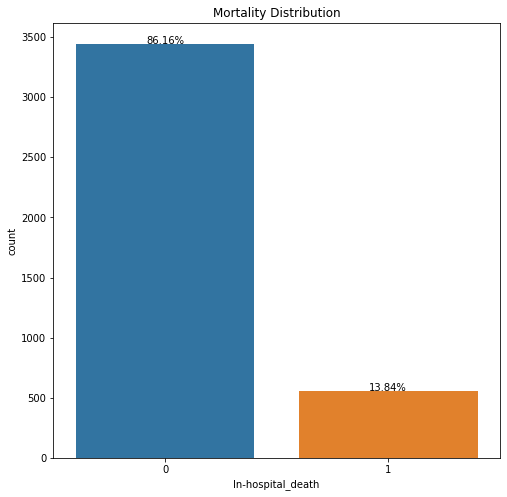

In [34]:
plt.figure(figsize = (8, 8))
ax = sns.countplot(df_merge['In-hospital_death'])
plt.title('Mortality Distribution')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.0, height + 3,
                f"{round(100 * height / len(df_merge), 2)}%",
                ha = 'center')

In [35]:
#!pip install -U pandasql
#from pandasql import sqldf 
#mysql = lambda q: sqldf(q, globals())
#mysql("SELECT Gender FROM info_df LIMIT 5;")
#'''
#SELECT m.Gender, b.'In-hospital_death'
#FROM info_df AS m
#INNER JOIN 
##outcomes_df AS b
#ON m.RecordID = b.RecordID;
#'''
#mysql(query)

Mortality Rate Based on Gender:

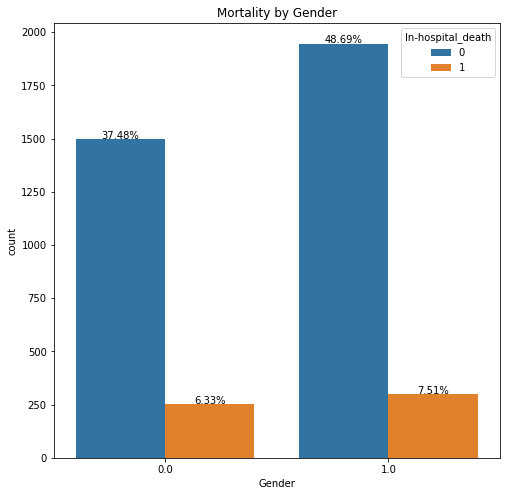

In [36]:
plt.figure(figsize = (8, 8))
plt.title('Mortality by Gender')
ax = sns.countplot(x = 'Gender', data = df_merge, hue = 'In-hospital_death')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.0, height + 3,
                f"{round(100 * height / len(df_merge), 2)}%",
                ha = 'center')

Distribution among each ICU_TYPE: Number of patients per ICU

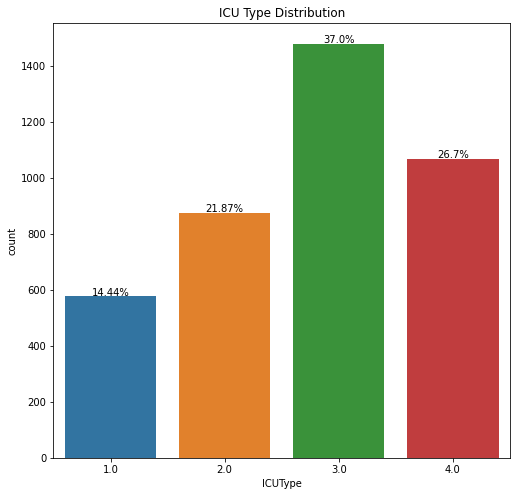

In [37]:
plt.figure(figsize = (18, 8))
plt.subplot(1, 2, 1)
plt.title('ICU Type Distribution')
ax = sns.countplot(x = 'ICUType', data = df_merge)
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.0, height + 3,
                f"{round(100 * height / len(df_merge), 2)}%",
                ha = 'center')
        


The Percentage of the In-Hospital_death according to the ICU_TYPE

In-hospital death (0: survivor, or 1: died in-hospital) 

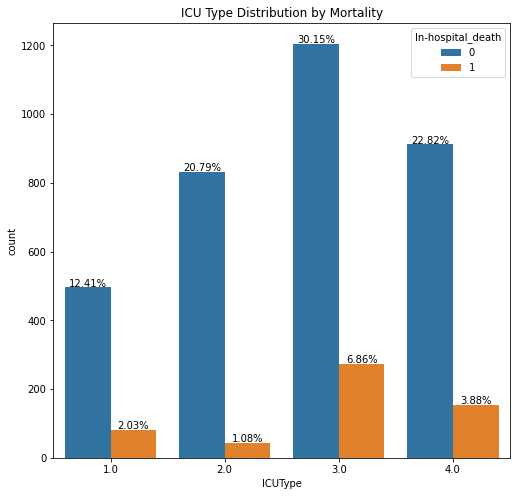

In [38]:
plt.figure(figsize = (18, 8))
plt.subplot(1, 2, 2)
plt.title('ICU Type Distribution by Mortality')
ax = sns.countplot(x = 'ICUType', data = df_merge, hue = 'In-hospital_death')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.0, height + 3,
                f"{round(100 * height / len(df_merge), 2)}%",
                ha = 'center')

In [39]:
readings_df.info

<bound method DataFrame.info of          RecordID   Time  Parameter   Value
0        140271.0  00:00    DiasABP   71.00
1        140271.0  00:00        GCS    3.00
2        140271.0  00:00         HR   91.00
3        140271.0  00:00        MAP  115.00
4        140271.0  00:00     SysABP  178.00
...           ...    ...        ...     ...
1737975  135127.0  47:47  NIDiasABP   64.00
1737976  135127.0  47:47      NIMAP   79.67
1737977  135127.0  47:47   NISysABP  111.00
1737978  135127.0  47:47      Urine   45.00
1737979  135127.0  47:47     Weight   96.40

[1737980 rows x 4 columns]>

In [40]:
readings_df.head(50)

,RecordID,Time,Parameter,Value
0,140271.0,00:00,DiasABP,71.00
1,140271.0,00:00,GCS,3.00
2,140271.0,00:00,HR,91.00
3,140271.0,00:00,MAP,115.00
4,140271.0,00:00,SysABP,178.00
5,140271.0,00:00,Temp,36.20
6,140271.0,00:00,Urine,1130.00
7,140271.0,00:00,Weight,74.50
8,140271.0,00:02,FiO2,0.50
9,140271.0,00:02,MechVent,1.00


In [41]:
readings_df['RecordID'].value_counts()

135365.0    1497
137996.0     980
133780.0     974
135481.0     958
138221.0     958
            ... 
133628.0       6
139060.0       2
140501.0       1
140936.0       1
141264.0       1
Name: RecordID, Length: 4000, dtype: int64

In [42]:
readings_df.isnull().sum()

RecordID     0
Time         0
Parameter    0
Value        0
dtype: int64

In [43]:
outcomes_df.shape

(4000, 6)

Getting the means corresponding to each patient readings in a new dataset:

In [44]:
data = {'Albumin ',
'ALP ',
'ALT',
'AST',
'Bilirubin',
'BUN',
'Cholesterol',
'Creatinine',
'DiasABP',
'FiO2',
'GCS',
'Glucose',
'HCO3',
'HCT',
'HR',
'K',
'Lactate',
'Mg',
'MAP',
'MechVent',
'Na',
'NIDiasABP',
'NIMAP',
'NISysABP',
'PaCO2',
'PaO2',
'pH',
'Platelets',
'RespRate',
'SaO2',
'SysABP' , 'Temp' ,'TropI' ,'TropT' ,'Urine','WBC',
'Weight'} 




# Aya :  Creating Dataset of the avg ,min, max value of every parameter for each patient
##### 2 - Trial to convert the million records to 4000 records#####

In [45]:
readings_df_copy = pd.read_csv(directory + 'readings.csv')


# grouped_multiple : is a dataset contains the mean , min , max values per patient per parameter.
saved to csv file named:  to_csv('dfmeans_values_Aya.csv')

In [46]:
grouped_multiple = readings_df_copy.groupby(['RecordID', 'Parameter']).agg({'Value': ['mean', 'min', 'max']})
grouped_multiple.columns = ['mean', 'min', 'max']
grouped_multiple = grouped_multiple.reset_index()
print(grouped_multiple)

        RecordID   Parameter        mean     min     max
0       132539.0         BUN   10.500000    8.00   13.00
1       132539.0  Creatinine    0.750000    0.70    0.80
2       132539.0         GCS   14.923077   14.00   15.00
3       132539.0     Glucose  160.000000  115.00  205.00
4       132539.0        HCO3   27.000000   26.00   28.00
...          ...         ...         ...     ...     ...
106988  142673.0        Temp   36.381395   34.60   37.90
106989  142673.0       Urine   57.750000    0.00  500.00
106990  142673.0         WBC    9.228571    4.80   11.90
106991  142673.0      Weight   87.838889   70.70   88.80
106992  142673.0          pH    7.305600    7.03    7.42

[106993 rows x 5 columns]


In [47]:
grouped_multiple.to_csv('dfmeans_values_Aya.csv')

In [48]:
grouped_multiple.isnull().sum()

RecordID     0
Parameter    0
mean         0
min          0
max          0
dtype: int64

In [49]:
# How many entries are there for each Parameter?
# Checking Whether 
grouped_multiple['Parameter'].value_counts()

Weight         4000
HR             3937
HCT            3936
Creatinine     3936
Temp           3936
BUN            3936
GCS            3936
Platelets      3932
WBC            3927
Na             3925
HCO3           3924
K              3904
Mg             3897
Glucose        3887
Urine          3883
NISysABP       3493
NIDiasABP      3483
NIMAP          3481
pH             3040
PaCO2          3023
PaO2           3023
DiasABP        2799
SysABP         2799
MAP            2792
FiO2           2717
MechVent       2529
Lactate        2183
SaO2           1792
AST            1725
ALT            1721
Bilirubin      1718
ALP            1690
Albumin        1615
RespRate       1101
TroponinT       863
Cholesterol     305
TroponinI       205
Name: Parameter, dtype: int64

In [50]:
grouped_multiple.drop(['min', 'max'], axis=1)

,RecordID,Parameter,mean
0,132539.0,BUN,10.500000
1,132539.0,Creatinine,0.750000
2,132539.0,GCS,14.923077
3,132539.0,Glucose,160.000000
4,132539.0,HCO3,27.000000
...,...,...,...
106988,142673.0,Temp,36.381395
106989,142673.0,Urine,57.750000
106990,142673.0,WBC,9.228571
106991,142673.0,Weight,87.838889


In [51]:
grouped_multiple.isnull().sum()

RecordID     0
Parameter    0
mean         0
min          0
max          0
dtype: int64

Creating new dataset excluding parameters not measured in more than 50 % of the patients : grouped_multiple_less_2000

In [52]:
# Setting a threshold if the count of a certain parameter is less than 2000 which means 50% of the patients don't have values, it will be ignored
#define values
values = ['SaO2', 'AST', 'ALT','Bilirubin','ALP','Albumin','RespRate','TroponinT','Cholesterol','TroponinI']

#drop rows that contain any value in the list
grouped_multiple_less_2000 = grouped_multiple[grouped_multiple.Parameter.isin(values) == False]
grouped_multiple_less_2000

,RecordID,Parameter,mean,min,max
0,132539.0,BUN,10.500000,8.00,13.00
1,132539.0,Creatinine,0.750000,0.70,0.80
2,132539.0,GCS,14.923077,14.00,15.00
3,132539.0,Glucose,160.000000,115.00,205.00
4,132539.0,HCO3,27.000000,26.00,28.00
...,...,...,...,...,...
106988,142673.0,Temp,36.381395,34.60,37.90
106989,142673.0,Urine,57.750000,0.00,500.00
106990,142673.0,WBC,9.228571,4.80,11.90
106991,142673.0,Weight,87.838889,70.70,88.80


In [53]:
grouped_multiple_less_2000['Parameter'].value_counts()

Weight        4000
HR            3937
BUN           3936
Creatinine    3936
GCS           3936
Temp          3936
HCT           3936
Platelets     3932
WBC           3927
Na            3925
HCO3          3924
K             3904
Mg            3897
Glucose       3887
Urine         3883
NISysABP      3493
NIDiasABP     3483
NIMAP         3481
pH            3040
PaCO2         3023
PaO2          3023
DiasABP       2799
SysABP        2799
MAP           2792
FiO2          2717
MechVent      2529
Lactate       2183
Name: Parameter, dtype: int64

In [54]:
# Data Set of Weight
grouped_multiple_Weight = grouped_multiple[grouped_multiple.Parameter == 'Weight'  ]
grouped_multiple_Weight.rename(columns = {'mean':'Weight'}, inplace = True)
grouped_multiple_Weight = grouped_multiple_Weight.drop(['Parameter','min','max'], axis=1)
print(grouped_multiple_Weight.isnull().sum())

RecordID    0
Weight      0
dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [55]:
isinstance(grouped_multiple_Weight, pd.DataFrame)

True

In [56]:
grouped_multiple.loc[grouped_multiple.Parameter == 'HR']

,RecordID,Parameter,mean,min,max
6,132539.0,HR,70.810811,58.0,86.0
27,132540.0,HR,80.794118,65.0,90.0
59,132541.0,HR,83.759259,57.0,113.0
90,132543.0,HR,70.983333,57.0,88.0
110,132545.0,HR,74.958333,65.0,94.0
...,...,...,...,...,...
106862,142665.0,HR,99.230769,83.0,113.0
106888,142667.0,HR,79.136364,59.0,106.0
106913,142670.0,HR,97.884615,80.0,143.0
106944,142671.0,HR,88.461538,74.0,101.0


In [57]:
# Data Set of HR 
grouped_multiple_HR  = grouped_multiple.loc[grouped_multiple.Parameter == 'HR']
grouped_multiple_HR.rename(columns = {'mean':'HR'}, inplace = True)
grouped_multiple_HR = grouped_multiple_HR.drop(['Parameter','min','max'], axis=1)
grouped_multiple_HR.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(3937, 2)

In [58]:
grouped_multiple_HR.shape

(3937, 2)

In [59]:
# Data Set of BUN
grouped_multiple_BUN  = grouped_multiple[grouped_multiple.Parameter == 'BUN']
grouped_multiple_BUN.rename(columns = {'mean':'BUN'}, inplace = True)
grouped_multiple_BUN= grouped_multiple_BUN.drop(['Parameter','min','max'], axis=1)
print(grouped_multiple_BUN.isnull().sum())

RecordID    0
BUN         0
dtype: int64


In [60]:
# Data Set of Creatinine
grouped_multiple_Creatinine  = grouped_multiple[grouped_multiple.Parameter == 'Creatinine']
grouped_multiple_Creatinine.rename(columns = {'mean':'Creatinine'}, inplace = True)
grouped_multiple_Creatinine = grouped_multiple_Creatinine.drop(['Parameter','min','max'], axis=1)
print(grouped_multiple_Creatinine.isnull().sum())

RecordID      0
Creatinine    0
dtype: int64


In [61]:
# Data Set of GCS
grouped_multiple_GCS  = grouped_multiple[grouped_multiple.Parameter == 'GCS']
grouped_multiple_GCS.rename(columns = {'mean':'GCS'}, inplace = True)
grouped_multiple_GCS = grouped_multiple_GCS.drop(['Parameter','min','max'], axis=1)
print(grouped_multiple_GCS.isnull().sum())

RecordID    0
GCS         0
dtype: int64


In [62]:
# Data Set of Temp
grouped_multiple_Temp  = grouped_multiple[grouped_multiple.Parameter == 'Temp']
grouped_multiple_Temp.rename(columns = {'mean':'Temp'}, inplace = True)
grouped_multiple_Temp = grouped_multiple_Temp.drop(['Parameter','min','max'], axis=1)
print(grouped_multiple_Temp.isnull().sum())

RecordID    0
Temp        0
dtype: int64


In [63]:
# Data Set of HCT
grouped_multiple_HCT  = grouped_multiple[grouped_multiple.Parameter == 'HCT']
grouped_multiple_HCT.rename(columns = {'mean':'HCT'}, inplace = True)
grouped_multiple_HCT = grouped_multiple_HCT.drop(['Parameter','min','max'], axis=1)
print(grouped_multiple_HCT.isnull().sum())

RecordID    0
HCT         0
dtype: int64


In [64]:
# Data Set of Platelets
grouped_multiple_Platelets  = grouped_multiple[grouped_multiple.Parameter == 'Platelets']
grouped_multiple_Platelets.rename(columns = {'mean':'Platelets'}, inplace = True)
grouped_multiple_Platelets = grouped_multiple_Platelets.drop(['Parameter','min','max'], axis=1)
print(grouped_multiple_Platelets.isnull().sum())

RecordID     0
Platelets    0
dtype: int64


In [65]:
# Data Set of WBC
grouped_multiple_WBC  = grouped_multiple[grouped_multiple.Parameter == 'WBC'  ]
grouped_multiple_WBC.rename(columns = {'mean':'WBC'}, inplace = True)
grouped_multiple_WBC = grouped_multiple_WBC.drop(['Parameter','min','max'], axis=1)
print(grouped_multiple_WBC.isnull().sum())

RecordID    0
WBC         0
dtype: int64


In [66]:
# Data Set of Na
grouped_multiple_Na  = grouped_multiple[grouped_multiple.Parameter == 'Na']
grouped_multiple_Na.rename(columns = {'mean':'Na'}, inplace = True)
grouped_multiple_Na = grouped_multiple_Na.drop(['Parameter','min','max'], axis=1)
print(grouped_multiple_Na.isnull().sum())

RecordID    0
Na          0
dtype: int64


In [67]:
# Data Set of HCO3 
#grouped_multiple.loc[grouped_multiple.Parameter == 'HCO3']
grouped_multiple_HCO3   = grouped_multiple[grouped_multiple.Parameter == 'HCO3']
grouped_multiple_HCO3.rename(columns = {'mean':'HCO3'}, inplace = True)
grouped_multiple_HCO3 = grouped_multiple_HCO3.drop(['Parameter','min','max'], axis=1)
print(grouped_multiple_HCO3.isnull().sum())

RecordID    0
HCO3        0
dtype: int64


In [68]:
# Data Set of k
grouped_multiple_k   = grouped_multiple.loc[grouped_multiple.Parameter == 'K']
grouped_multiple_k.rename(columns = {'mean':'k'}, inplace = True)
grouped_multiple_k = grouped_multiple_k.drop(['Parameter','min','max'], axis=1)
print(grouped_multiple_k.isnull().sum())

RecordID    0
k           0
dtype: int64


In [69]:
# Data Set of Mg
grouped_multiple_Mg   = grouped_multiple[grouped_multiple.Parameter == 'Mg']
grouped_multiple_Mg.rename(columns = {'mean':'Mg'}, inplace = True)
grouped_multiple_Mg = grouped_multiple_Mg.drop(['Parameter','min','max'], axis=1)
print(grouped_multiple_Mg.isnull().sum())

RecordID    0
Mg          0
dtype: int64


In [70]:
# Data Set of Glucose
grouped_multiple_Glucose   = grouped_multiple[grouped_multiple.Parameter == 'Glucose']
grouped_multiple_Glucose.rename(columns = {'mean':'Glucose'}, inplace = True)
grouped_multiple_Glucose= grouped_multiple_Glucose.drop(['Parameter','min','max'], axis=1)
print(grouped_multiple_Glucose.isnull().sum())

RecordID    0
Glucose     0
dtype: int64


In [71]:
# Data Set of Urine
grouped_multiple_Urine   = grouped_multiple[grouped_multiple.Parameter == 'Urine']
grouped_multiple_Urine.rename(columns = {'mean':'Urine'}, inplace = True)
grouped_multiple_Urine= grouped_multiple_Urine.drop(['Parameter','min','max'], axis=1)
print(grouped_multiple_Urine.isnull().sum())


RecordID    0
Urine       0
dtype: int64


In [72]:
# Data Set of NISysABP
grouped_multiple_NISysABP   = grouped_multiple[grouped_multiple.Parameter == 'NISysABP']
grouped_multiple_NISysABP.rename(columns = {'mean':'NISysABP'}, inplace = True)
grouped_multiple_NISysABP= grouped_multiple_NISysABP.drop(['Parameter','min','max'], axis=1)
print(grouped_multiple_NISysABP.isnull().sum())

RecordID    0
NISysABP    0
dtype: int64


In [73]:
# Data Set of NIDiasABP
grouped_multiple_NIDiasABP   = grouped_multiple[grouped_multiple.Parameter == 'NIDiasABP']
grouped_multiple_NIDiasABP.rename(columns = {'mean':'NIDiasABP'}, inplace = True)
grouped_multiple_NIDiasABP= grouped_multiple_NIDiasABP.drop(['Parameter','min','max'], axis=1)
print(grouped_multiple_NIDiasABP.isnull().sum())

RecordID     0
NIDiasABP    0
dtype: int64


In [74]:
# Data Set of NIMAP
grouped_multiple_NIMAP   = grouped_multiple[grouped_multiple.Parameter == 'NIMAP']
grouped_multiple_NIMAP.rename(columns = {'mean':'NIMAP'}, inplace = True)
grouped_multiple_NIMAP= grouped_multiple_NIMAP.drop(['Parameter','min','max'], axis=1)
print(grouped_multiple_NIMAP.isnull().sum())

RecordID    0
NIMAP       0
dtype: int64


In [75]:
# Data Set of pH
grouped_multiple_pH   = grouped_multiple[grouped_multiple.Parameter == 'pH']
grouped_multiple_pH.rename(columns = {'mean':'pH'}, inplace = True)
grouped_multiple_pH= grouped_multiple_pH.drop(['Parameter','min','max'], axis=1)
print(grouped_multiple_pH.isnull().sum())

RecordID    0
pH          0
dtype: int64


In [76]:
# Data Set of PaCO2
grouped_multiple_PaCO2   = grouped_multiple[grouped_multiple.Parameter == 'PaCO2']
grouped_multiple_PaCO2.rename(columns = {'mean':'PaCO2'}, inplace = True)
grouped_multiple_PaCO2= grouped_multiple_PaCO2.drop(['Parameter','min','max'], axis=1)
print(grouped_multiple_PaCO2.isnull().sum())

RecordID    0
PaCO2       0
dtype: int64


In [77]:
# Data Set of PaO2
grouped_multiple_PaO2   = grouped_multiple[grouped_multiple.Parameter == 'PaO2']
grouped_multiple_PaO2.rename(columns = {'mean':'PaO2'}, inplace = True)
grouped_multiple_PaO2= grouped_multiple_PaO2.drop(['Parameter','min','max'], axis=1)
print(grouped_multiple_PaO2.isnull().sum())

RecordID    0
PaO2        0
dtype: int64


In [78]:
# Data Set of DiasABP
grouped_multiple_DiasABP   = grouped_multiple[grouped_multiple.Parameter == 'DiasABP']
grouped_multiple_DiasABP.rename(columns = {'mean':'DiasABP'}, inplace = True)
grouped_multiple_DiasABP= grouped_multiple_DiasABP.drop(['Parameter','min','max'], axis=1)
print(grouped_multiple_DiasABP.isnull().sum())

RecordID    0
DiasABP     0
dtype: int64


In [79]:
# Data Set of SysABP
grouped_multiple_SysABP   = grouped_multiple[grouped_multiple.Parameter == 'SysABP']
grouped_multiple_SysABP.rename(columns = {'mean':'SysABP'}, inplace = True)
grouped_multiple_SysABP= grouped_multiple_SysABP.drop(['Parameter','min','max'], axis=1)
print(grouped_multiple_SysABP.isnull().sum())

RecordID    0
SysABP      0
dtype: int64


In [80]:
# Data Set of MAP
grouped_multiple_MAP   = grouped_multiple[grouped_multiple.Parameter == 'MAP']
grouped_multiple_MAP.rename(columns = {'mean':'MAP'}, inplace = True)
grouped_multiple_MAP= grouped_multiple_MAP.drop(['Parameter','min','max'], axis=1)
print(grouped_multiple_MAP.isnull().sum())

RecordID    0
MAP         0
dtype: int64


In [81]:
# Data Set of FiO2
grouped_multiple_FiO2   = grouped_multiple[grouped_multiple.Parameter == 'FiO2']
grouped_multiple_FiO2.rename(columns = {'mean':'FiO2'}, inplace = True)
grouped_multiple_FiO2= grouped_multiple_FiO2.drop(['Parameter','min','max'], axis=1)
print(grouped_multiple_FiO2.isnull().sum())

RecordID    0
FiO2        0
dtype: int64


In [82]:
# Data Set of MechVent
grouped_multiple_MechVent   = grouped_multiple[grouped_multiple.Parameter == 'MechVent']
grouped_multiple_MechVent.rename(columns = {'mean':'MechVent'}, inplace = True)
grouped_multiple_MechVent= grouped_multiple_MechVent.drop(['Parameter','min','max'], axis=1)
print(grouped_multiple_MechVent.isnull().sum())

RecordID    0
MechVent    0
dtype: int64


In [83]:
# Data Set of Lactate
grouped_multiple_Lactate   = grouped_multiple[grouped_multiple.Parameter == 'Lactate']
grouped_multiple_Lactate.rename(columns = {'mean':'Lactate'}, inplace = True)
grouped_multiple_Lactate= grouped_multiple_Lactate.drop(['Parameter','min','max'], axis=1)
print(grouped_multiple_Lactate.isnull().sum())

RecordID    0
Lactate     0
dtype: int64


In [84]:
import pandas as pd
from functools import reduce

In [85]:
info_df.columns

Index(['RecordID', 'Age', 'Gender', 'Height', 'ICUType', 'Weight'], dtype='object')

In [86]:
df_survivals = outcomes_df[['RecordID','In-hospital_death']]
df_ICUTYPE = info_df[['RecordID','ICUType']]
df_Age = info_df[['RecordID','Age']]
df_SOFA = outcomes_df[['RecordID','SOFA']]
df_SAPSI = outcomes_df[['RecordID','SAPS-I']]

In [87]:
#define list of DataFrames
list_df_more_2000 = [df_survivals,df_ICUTYPE,df_Age,df_SOFA,df_SAPSI,grouped_multiple_Weight,grouped_multiple_HR,grouped_multiple_BUN,grouped_multiple_Creatinine,grouped_multiple_GCS,
           grouped_multiple_Temp,grouped_multiple_HCT ,grouped_multiple_Platelets, grouped_multiple_WBC, grouped_multiple_Na,
           grouped_multiple_HCO3,grouped_multiple_k,grouped_multiple_Mg,grouped_multiple_Glucose,grouped_multiple_Urine,
           grouped_multiple_NISysABP,grouped_multiple_NIDiasABP,grouped_multiple_NIMAP,grouped_multiple_pH,
           grouped_multiple_PaCO2,grouped_multiple_PaO2,grouped_multiple_DiasABP,grouped_multiple_SysABP,
           grouped_multiple_MAP,grouped_multiple_FiO2,grouped_multiple_MechVent,grouped_multiple_Lactate ]

In [88]:
#merge all DataFrames into one
final_df_means = reduce(lambda  left,right: pd.merge(left,right,on=['RecordID'],
                                            how='outer'), list_df_more_2000)
final_df_means.isnull().sum()

RecordID                0
In-hospital_death       0
ICUType                 0
Age                     0
SOFA                    0
SAPS-I                  0
Weight                  0
HR                     63
BUN                    64
Creatinine             64
GCS                    64
Temp                   64
HCT                    64
Platelets              68
WBC                    73
Na                     75
HCO3                   76
k                      96
Mg                    103
Glucose               113
Urine                 117
NISysABP              507
NIDiasABP             517
NIMAP                 519
pH                    960
PaCO2                 977
PaO2                  977
DiasABP              1201
SysABP               1201
MAP                  1208
FiO2                 1283
MechVent             1471
Lactate              1817
dtype: int64

# Final dataset

In [89]:
final_df_means.to_csv(directory + 'final_df_means.csv', index=False)

In [90]:
final_df_means = pd.read_csv(directory + 'final_df_means.csv')

In [91]:
final_df_means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RecordID           4000 non-null   int64  
 1   In-hospital_death  4000 non-null   int64  
 2   ICUType            4000 non-null   float64
 3   Age                4000 non-null   float64
 4   SOFA               4000 non-null   int64  
 5   SAPS-I             4000 non-null   int64  
 6   Weight             4000 non-null   float64
 7   HR                 3937 non-null   float64
 8   BUN                3936 non-null   float64
 9   Creatinine         3936 non-null   float64
 10  GCS                3936 non-null   float64
 11  Temp               3936 non-null   float64
 12  HCT                3936 non-null   float64
 13  Platelets          3932 non-null   float64
 14  WBC                3927 non-null   float64
 15  Na                 3925 non-null   float64
 16  HCO3               3924 

In [92]:
final_df_means.shape

(4000, 33)

In [93]:
final_df_means.isnull().sum()

RecordID                0
In-hospital_death       0
ICUType                 0
Age                     0
SOFA                    0
SAPS-I                  0
Weight                  0
HR                     63
BUN                    64
Creatinine             64
GCS                    64
Temp                   64
HCT                    64
Platelets              68
WBC                    73
Na                     75
HCO3                   76
k                      96
Mg                    103
Glucose               113
Urine                 117
NISysABP              507
NIDiasABP             517
NIMAP                 519
pH                    960
PaCO2                 977
PaO2                  977
DiasABP              1201
SysABP               1201
MAP                  1208
FiO2                 1283
MechVent             1471
Lactate              1817
dtype: int64

In [94]:
# Cleaning the data from the nulls
# Split the data into two datasets based on In-hospital_death

# splitting the dataframe into 2 parts

df_0 = final_df_means[final_df_means['In-hospital_death']== 0]
df_1 = final_df_means[final_df_means['In-hospital_death']== 1]

In [95]:
# Replace nan values with average of columns
df_0.mean()
df_0.fillna(value=df_0['In-hospital_death'].mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [96]:
df_0


,RecordID,In-hospital_death,ICUType,Age,SOFA,SAPS-I,Weight,HR,BUN,Creatinine,...,NIMAP,pH,PaCO2,PaO2,DiasABP,SysABP,MAP,FiO2,MechVent,Lactate
0,132539,0,4.0,54.0,1,6,-1.000000,70.810811,10.500000,0.750000,...,71.559118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,132540,0,2.0,76.0,8,16,80.670588,80.794118,18.333333,1.100000,...,75.308571,7.395000,38.857143,210.142857,58.897059,113.411765,76.940299,0.560000,1.0,0.000000
2,132541,0,3.0,44.0,11,21,56.700000,83.759259,4.666667,0.333333,...,96.751316,7.495000,35.500000,134.500000,67.125000,125.687500,90.437500,0.500000,1.0,1.366667
3,132543,0,3.0,68.0,1,7,84.600000,70.983333,17.666667,0.766667,...,83.885517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,132545,0,3.0,88.0,2,17,-1.000000,74.958333,35.000000,1.000000,...,74.946512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,142664,0,4.0,51.0,8,13,75.000000,95.827586,11.333333,0.466667,...,0.000000,7.443333,40.000000,138.250000,70.103448,117.258621,86.396552,0.414286,1.0,0.000000
3995,142665,0,4.0,70.0,7,19,87.000000,99.230769,16.000000,0.900000,...,79.144333,7.381429,40.428571,141.285714,68.865385,117.230769,86.865385,0.442857,1.0,2.200000
3996,142667,0,3.0,25.0,2,8,166.400000,79.136364,4.400000,0.840000,...,81.471364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3997,142670,0,3.0,44.0,5,8,109.000000,97.884615,7.750000,1.125000,...,80.529130,7.396667,42.000000,149.000000,74.166667,125.666667,89.666667,0.412500,1.0,0.000000


In [97]:
# Replace nan values with average of columns
df_1.mean()
df_1.fillna(value=df_1['In-hospital_death'].mean(), inplace=True)
df_1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,RecordID,In-hospital_death,ICUType,Age,SOFA,SAPS-I,Weight,HR,BUN,Creatinine,...,NIMAP,pH,PaCO2,PaO2,DiasABP,SysABP,MAP,FiO2,MechVent,Lactate
7,132551,1,3.0,78.0,8,19,48.400,70.945205,64.600000,0.680000,...,55.177907,7.274000,30.533333,130.400000,39.266667,125.550000,64.766667,0.536364,1.0,1.6375
20,132588,1,3.0,48.0,7,-1,42.300,93.850000,6.000000,2.850000,...,64.148611,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0000
26,132598,1,4.0,80.0,5,22,60.000,78.708861,23.666667,0.833333,...,89.037674,7.484286,28.285714,190.571429,68.464789,143.591549,95.478873,0.493750,1.0,1.0000
29,132602,1,3.0,80.0,1,13,70.000,74.452830,29.500000,1.200000,...,80.791667,7.510000,37.000000,61.000000,1.000000,1.000000,1.000000,0.942222,1.0,1.0000
30,132605,1,3.0,90.0,9,21,55.000,72.122807,27.000000,0.400000,...,64.095000,7.420000,45.000000,118.000000,1.000000,1.000000,1.000000,0.415385,1.0,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3973,142603,1,4.0,61.0,7,13,80.375,92.333333,29.666667,0.733333,...,1.000000,7.500000,32.700000,113.100000,71.383562,126.958904,90.273973,0.400000,1.0,1.8000
3977,142618,1,3.0,57.0,8,21,93.500,100.108434,13.000000,0.650000,...,66.866444,7.462500,38.000000,118.125000,53.890244,104.975610,69.111111,0.492857,1.0,2.8000
3979,142626,1,4.0,83.0,4,16,70.000,93.139241,28.250000,1.800000,...,75.032000,7.408000,39.600000,135.800000,64.958333,139.250000,88.971014,1.000000,1.0,1.3000
3983,142638,1,3.0,74.0,7,19,65.000,57.946429,57.000000,5.100000,...,54.635926,7.146667,53.000000,82.666667,47.800000,93.000000,65.200000,1.000000,1.0,3.1000


In [98]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 7 to 3998
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RecordID           554 non-null    int64  
 1   In-hospital_death  554 non-null    int64  
 2   ICUType            554 non-null    float64
 3   Age                554 non-null    float64
 4   SOFA               554 non-null    int64  
 5   SAPS-I             554 non-null    int64  
 6   Weight             554 non-null    float64
 7   HR                 554 non-null    float64
 8   BUN                554 non-null    float64
 9   Creatinine         554 non-null    float64
 10  GCS                554 non-null    float64
 11  Temp               554 non-null    float64
 12  HCT                554 non-null    float64
 13  Platelets          554 non-null    float64
 14  WBC                554 non-null    float64
 15  Na                 554 non-null    float64
 16  HCO3               554 no

In [99]:
conc_final_df = pd.concat([df_0, df_1])

In [100]:
conc_final_df.to_csv(directory + 'f_means_df.csv', index=False)

In [101]:
conc_final_df.to_csv( 'f_means_df.csv', index=False)

In [102]:
conc_final_df = pd.read_csv(directory + 'f_means_df.csv')

In [103]:
conc_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RecordID           4000 non-null   int64  
 1   In-hospital_death  4000 non-null   int64  
 2   ICUType            4000 non-null   float64
 3   Age                4000 non-null   float64
 4   SOFA               4000 non-null   int64  
 5   SAPS-I             4000 non-null   int64  
 6   Weight             4000 non-null   float64
 7   HR                 4000 non-null   float64
 8   BUN                4000 non-null   float64
 9   Creatinine         4000 non-null   float64
 10  GCS                4000 non-null   float64
 11  Temp               4000 non-null   float64
 12  HCT                4000 non-null   float64
 13  Platelets          4000 non-null   float64
 14  WBC                4000 non-null   float64
 15  Na                 4000 non-null   float64
 16  HCO3               4000 

In [104]:
conc_final_df.isnull().sum()

RecordID             0
In-hospital_death    0
ICUType              0
Age                  0
SOFA                 0
SAPS-I               0
Weight               0
HR                   0
BUN                  0
Creatinine           0
GCS                  0
Temp                 0
HCT                  0
Platelets            0
WBC                  0
Na                   0
HCO3                 0
k                    0
Mg                   0
Glucose              0
Urine                0
NISysABP             0
NIDiasABP            0
NIMAP                0
pH                   0
PaCO2                0
PaO2                 0
DiasABP              0
SysABP               0
MAP                  0
FiO2                 0
MechVent             0
Lactate              0
dtype: int64

In [105]:
conc_final_df.corr()['In-hospital_death']

RecordID            -0.011532
In-hospital_death    1.000000
ICUType              0.059896
Age                  0.130700
SOFA                 0.177288
SAPS-I               0.156008
Weight              -0.010130
HR                   0.071650
BUN                  0.224256
Creatinine           0.120990
GCS                 -0.221835
Temp                 0.013488
HCT                  0.011201
Platelets           -0.012724
WBC                  0.099898
Na                   0.027750
HCO3                -0.084656
k                    0.042925
Mg                   0.077304
Glucose              0.109570
Urine               -0.119227
NISysABP            -0.013219
NIDiasABP           -0.029467
NIMAP               -0.021005
pH                   0.093450
PaCO2                0.060434
PaO2                 0.021449
DiasABP              0.018076
SysABP               0.019675
MAP                  0.024285
FiO2                 0.346808
MechVent             0.280123
Lactate              0.272493
Name: In-h

In [106]:
conc_final_df.corr()['ICUType']

RecordID             0.016971
In-hospital_death    0.059896
ICUType              1.000000
Age                 -0.187445
SOFA                -0.076382
SAPS-I              -0.049963
Weight              -0.044841
HR                   0.062254
BUN                 -0.072230
Creatinine          -0.052684
GCS                 -0.108463
Temp                 0.012054
HCT                 -0.026812
Platelets            0.017400
WBC                 -0.014523
Na                   0.002998
HCO3                -0.027032
k                   -0.109030
Mg                  -0.121072
Glucose              0.003270
Urine               -0.013130
NISysABP             0.169879
NIDiasABP            0.149650
NIMAP                0.158350
pH                  -0.016307
PaCO2               -0.005528
PaO2                -0.085170
DiasABP             -0.003356
SysABP               0.015843
MAP                  0.004222
FiO2                -0.012944
MechVent             0.005907
Lactate              0.074396
Name: ICUT

In [107]:
conc_final_df.columns

Index(['RecordID', 'In-hospital_death', 'ICUType', 'Age', 'SOFA', 'SAPS-I',
       'Weight', 'HR', 'BUN', 'Creatinine', 'GCS', 'Temp', 'HCT', 'Platelets',
       'WBC', 'Na', 'HCO3', 'k', 'Mg', 'Glucose', 'Urine', 'NISysABP',
       'NIDiasABP', 'NIMAP', 'pH', 'PaCO2', 'PaO2', 'DiasABP', 'SysABP', 'MAP',
       'FiO2', 'MechVent', 'Lactate'],
      dtype='object')

In [108]:
Features =  ['In-hospital_death', 'ICUType', 'mean_Weight', 'mean_HR',
       'mean_BUN', 'mean_Creatinine', 'mean_GCS', 'mean_Temp', 'mean_HCT',
       'mean_Platelets', 'mean_WBC', 'mean_Na', 'mean_HCO3', 'mean_k',
       'mean_Mg', 'mean_Glucose', 'mean_Urine', 'mean_NISysABP',
       'mean_NIDiasABP', 'mean_NIMAP', 'mean_pH', 'mean_PaCO2', 'mean_PaO2',
       'mean_DiasABP', 'mean_SysABP', 'mean_MAP', 'mean_FiO2', 'mean_MechVent',
       'mean_Lactate']
Labels =   ['In-hospital_death']

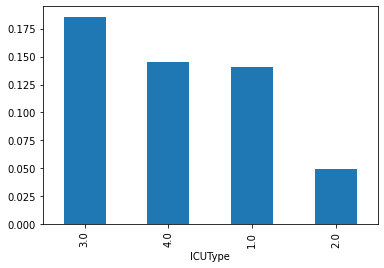

In [109]:
conc_final_df.groupby('ICUType')['In-hospital_death'].mean().nlargest(20).plot.bar()

In [110]:
cor = conc_final_df.corr()
#Correlation with output variable
cor_target = abs(cor["ICUType"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

ICUType    1.0
Name: ICUType, dtype: float64